### Import Packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix,plot_roc_curve,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

### Read Dataset

In [5]:
df = pd.read_csv('predictive_maintenance.csv')
print(f"shape of the dataset: {df.shape}")

shape of the dataset: (10000, 10)


In [6]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


### Data Visualization

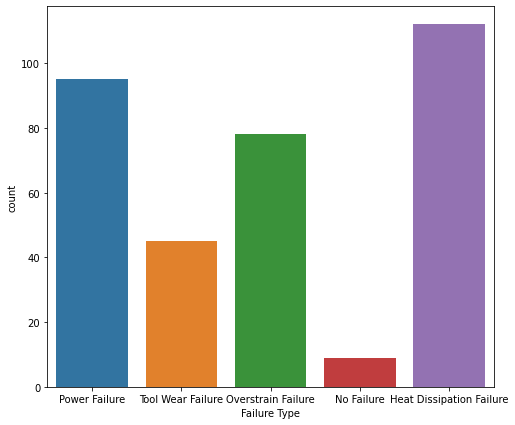

In [8]:
f = plt.figure(figsize=(8, 7))
sns.countplot(x="Failure Type",data=df[df['Target'] == 1])
plt.show()

**NOTE:** As it appears there are some records which are said to be failing which appears in the type as No failure so we are going to remove them as they are about 9 records which is not significant in the data.

In [9]:
df.loc[(df['Target']==1) & (df['Failure Type'] == 'No Failure'),'Target'] = np.nan
df.dropna(inplace = True)

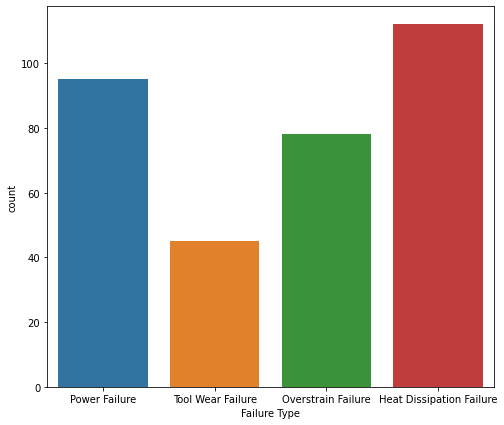

In [10]:
f = plt.figure(figsize=(8, 7))
sns.countplot(x="Failure Type",data=df[df['Target'] == 1])
plt.show()

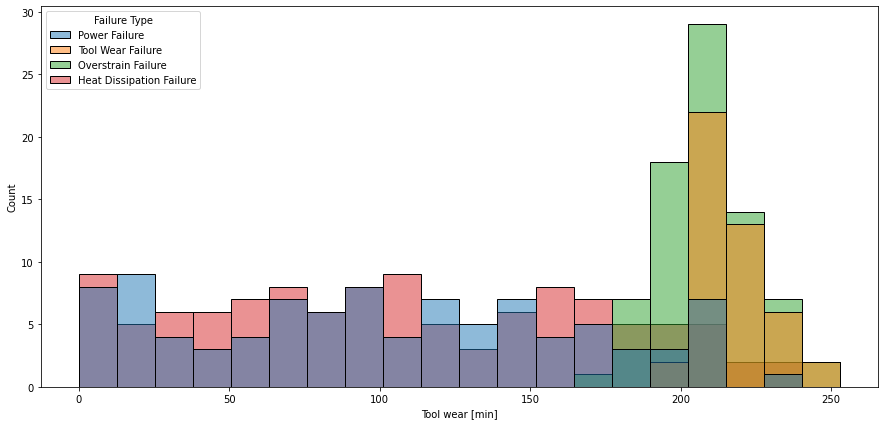

In [11]:
f = plt.figure(figsize=(15, 7))
sns.histplot(data=df[df['Target'] ==1],x='Tool wear [min]',hue = 'Failure Type',bins = 20)
plt.show()

We can check the values at which the machine fails with different failling types.

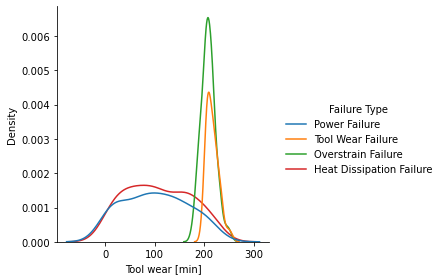

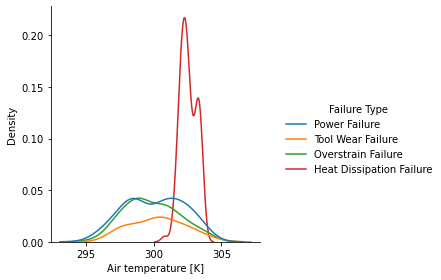

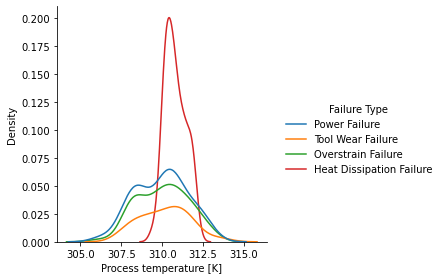

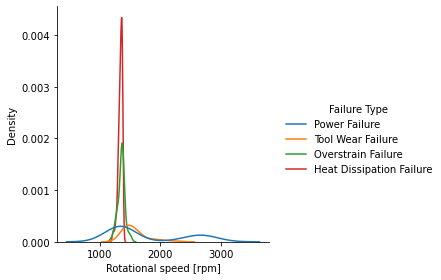

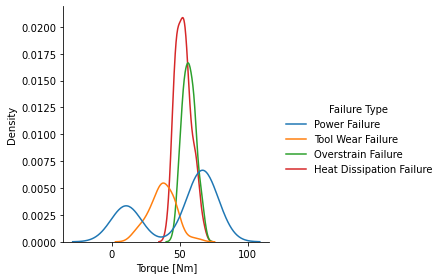

In [12]:
sns.displot(data=df[df['Target'] == 1], x='Tool wear [min]', hue="Failure Type", kind="kde", height=4)
sns.displot(data=df[df['Target'] == 1], x='Air temperature [K]', hue="Failure Type", kind="kde", height=4)
sns.displot(data=df[df['Target'] == 1], x='Process temperature [K]', hue="Failure Type", kind="kde", height=4)
sns.displot(data=df[df['Target'] == 1], x='Rotational speed [rpm]', hue="Failure Type", kind="kde", height=4)
sns.displot(data=df[df['Target'] == 1], x='Torque [Nm]', hue="Failure Type", kind="kde", height=4)

In [13]:
df = pd.get_dummies(df,columns= ['Type'])

In [14]:
df.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0.0,No Failure,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0.0,No Failure,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0.0,No Failure,0,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0.0,No Failure,0,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0.0,No Failure,0,1,0


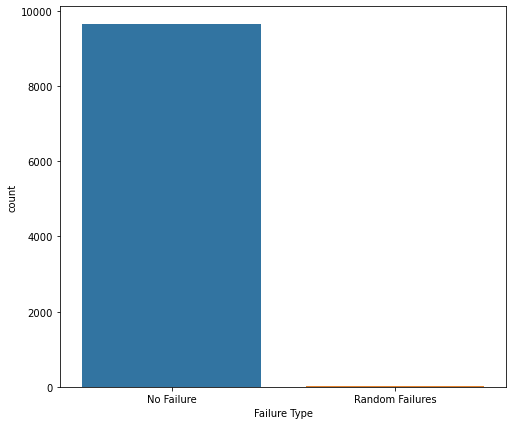

In [15]:
f = plt.figure(figsize=(8, 7))
sns.countplot(x="Failure Type",data=df[df['Target'] == 0])
plt.show()

**NOTE:** As it appears there are some records which are said to be not failing which appears in the type as Random Failure so we are going to remove them as they are about 18 records which is not significant in the data.

In [16]:
df.loc[(df['Target']==0) & (df['Failure Type'] == 'Random Failures'),'Target'] = np.nan
df.dropna(inplace = True)

Check where machine not fails

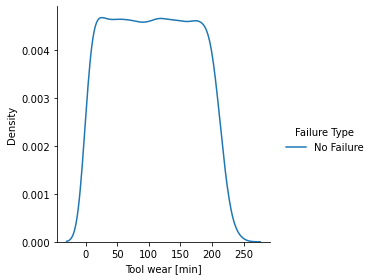

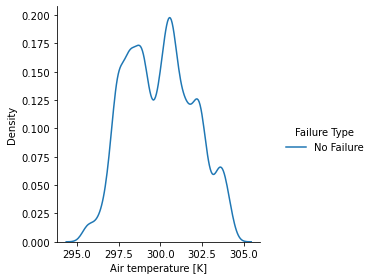

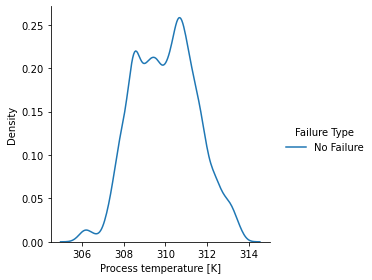

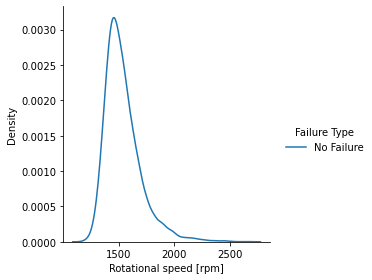

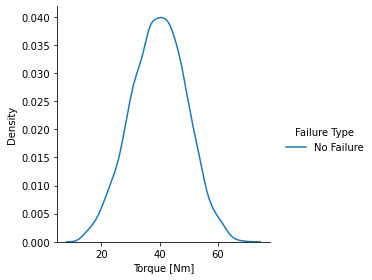

In [17]:
sns.displot(data=df[df['Target'] == 0], x='Tool wear [min]', hue="Failure Type", kind="kde", height=4)
sns.displot(data=df[df['Target'] == 0], x='Air temperature [K]', hue="Failure Type", kind="kde", height=4)
sns.displot(data=df[df['Target'] == 0], x='Process temperature [K]', hue="Failure Type", kind="kde", height=4)
sns.displot(data=df[df['Target'] == 0], x='Rotational speed [rpm]', hue="Failure Type", kind="kde", height=4)
sns.displot(data=df[df['Target'] == 0], x='Torque [Nm]', hue="Failure Type", kind="kde", height=4)

Add nf feature

<AxesSubplot:xlabel='nf', ylabel='Rotational speed [rpm]'>

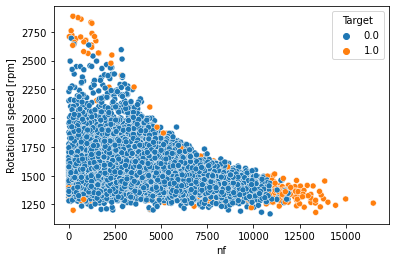

In [18]:
df['nf'] = df['Tool wear [min]'] * df['Torque [Nm]']
sns.scatterplot(data=df,x='nf',y='Rotational speed [rpm]',hue='Target')

In [19]:
df.columns

Index(['UDI', 'Product ID', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type', 'Type_H', 'Type_L', 'Type_M', 'nf'],
      dtype='object')

In [20]:
target_features =['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
      'Type_H', 'Type_L', 'Type_M','nf']
failure_type_features = ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
      'Type_H', 'Type_L', 'Type_M','Target','nf']

In [21]:
x=df[target_features]
y=df['Target'].astype(int)

### Split dataset to train and test

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.3,
                                                    stratify=y)

### Scaling the train dataset and perform upsampling using SMOTE

In [23]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
scaler_columns = ['Air temperature [K]', 'Process temperature [K]',
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','nf']
scaler.fit(X_train[scaler_columns])
X_train[scaler_columns] = scaler.transform(X_train[scaler_columns])

X_train.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,nf
350,-1.193256,-1.143109,-0.769969,0.427114,-1.026248,1,0,0,-0.857585
59,-0.597577,-0.607045,-0.893018,1.437707,0.887901,0,1,0,1.629079
6368,-0.001899,-0.272006,-0.641327,0.867372,-0.649694,0,0,1,-0.380023
9746,-0.597577,-0.003974,-0.753189,0.557190,1.201696,0,1,0,1.439179
8811,-1.391816,-1.009093,0.203235,-0.423386,-0.210381,0,1,0,-0.331458


Using SMOTE to perform upsampling

In [24]:
y = y.astype('int')
X_balance,Y_balance = SMOTE().fit_resample(X_train,y_train)
X_balance = pd.DataFrame(X_balance, columns = X_train.columns)

In [25]:
X_test[scaler_columns] = scaler.transform(X_test[scaler_columns])
X_test_balance = X_test

### Start training

In [26]:
# for error in column names when using xgboost we are going to change column names to be able to process it
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_balance.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_balance.columns.values]
X_test_balance.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test_balance.columns.values]

In [27]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(C = 0.8,kernel='linear',probability=True),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(n_estimators=250,max_depth=12,min_samples_leaf=16),
    "XGBoost" : XGBClassifier(max_depth=12,
                              n_estimators=250,
                              min_child_weight=8, 
                              subsample=0.8, 
                              learning_rate =0.02,    
                              seed=42,
                              eval_metric='mlogloss'),
    "CatBoost" : CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42)
}

result_table = pd.DataFrame(columns=['classifiers','accuracy','presicion','recall','f1_score','fpr','tpr','auc'])

for key, classifier in tqdm(classifiers.items()):
    classifier.fit(X_balance, Y_balance)
    y_predict = classifier.predict(X_test_balance)
    
    yproba = classifier.predict_proba(X_test_balance)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    conf_matrix = confusion_matrix(y_test,y_predict)
    
    result_table = result_table.append({'classifiers':key,
                                        'accuracy':accuracy_score(y_test, y_predict),
                                        'presicion':precision_score(y_test, y_predict, average='weighted'),
                                        'recall':recall_score(y_test, y_predict, average='weighted'),
                                        'f1_score':f1_score(y_test, y_predict, average='weighted'),
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc
                                         }, ignore_index=True)
        
result_table.set_index('classifiers', inplace=True)

  0%|          | 0/7 [00:00<?, ?it/s]

0:	learn: 0.3924718	total: 7.07s	remaining: 29m 20s
25:	learn: 0.0196402	total: 2m 56s	remaining: 25m 20s
50:	learn: 0.0083901	total: 5m 48s	remaining: 22m 41s
75:	learn: 0.0047396	total: 8m 59s	remaining: 20m 36s
100:	learn: 0.0030268	total: 11m 56s	remaining: 17m 36s
125:	learn: 0.0022307	total: 14m 41s	remaining: 14m 27s
150:	learn: 0.0021752	total: 16m 36s	remaining: 10m 53s
175:	learn: 0.0021745	total: 18m 29s	remaining: 7m 46s
200:	learn: 0.0021523	total: 20m 27s	remaining: 4m 59s
225:	learn: 0.0021515	total: 22m 28s	remaining: 2m 23s
249:	learn: 0.0021510	total: 24m 19s	remaining: 0us


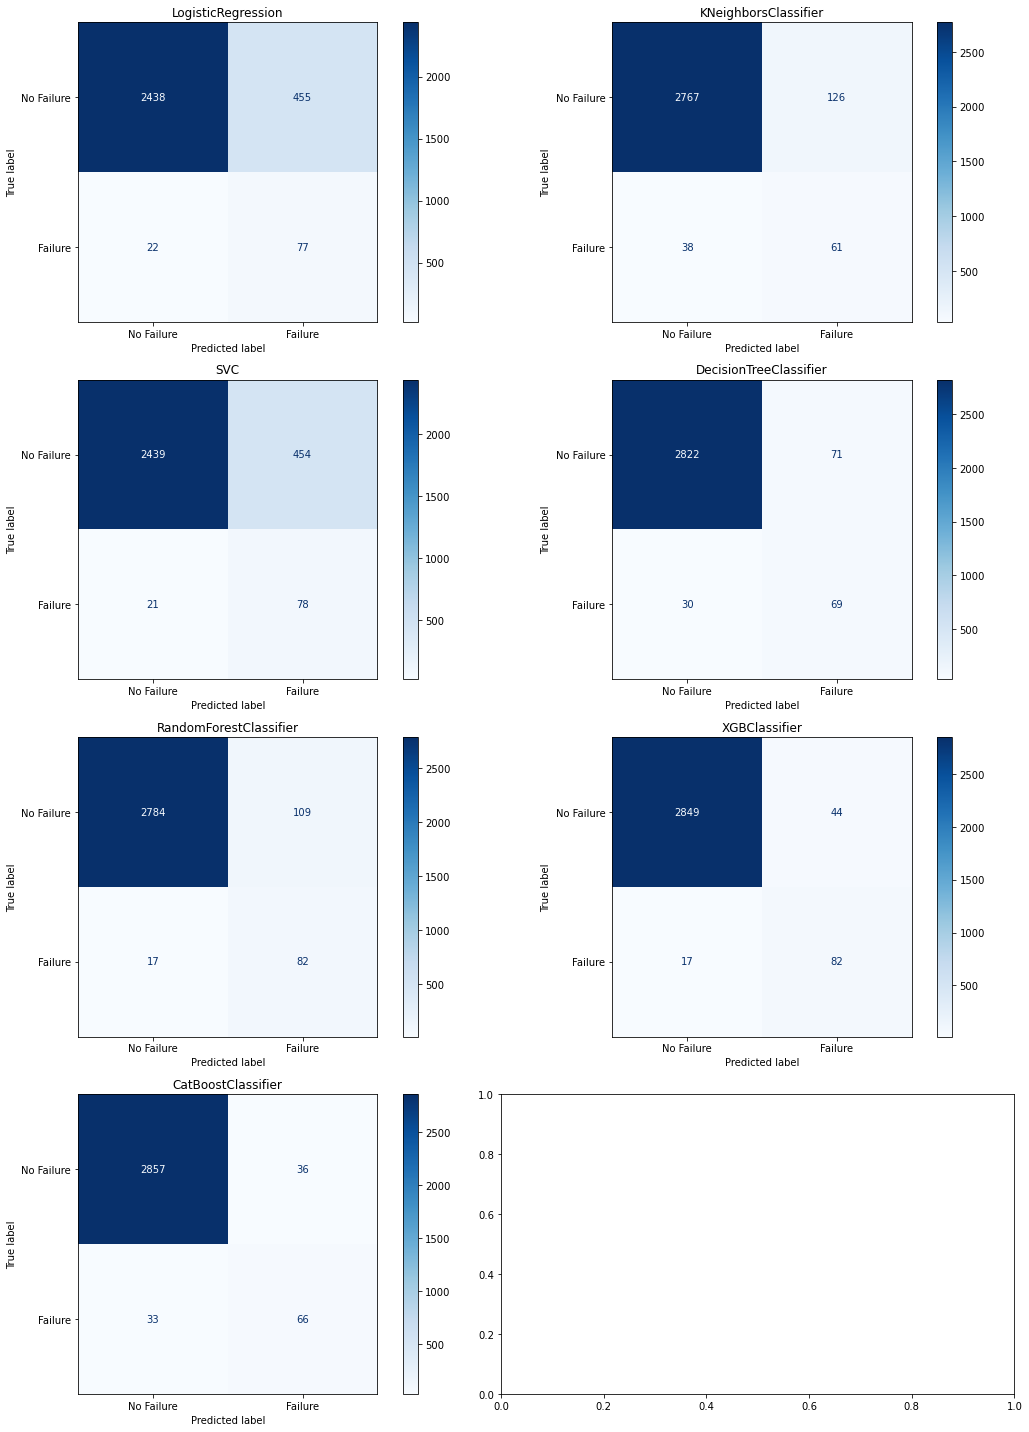

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for cls, ax in zip(list(classifiers.values()), axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                          display_labels=['No Failure','Failure'])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

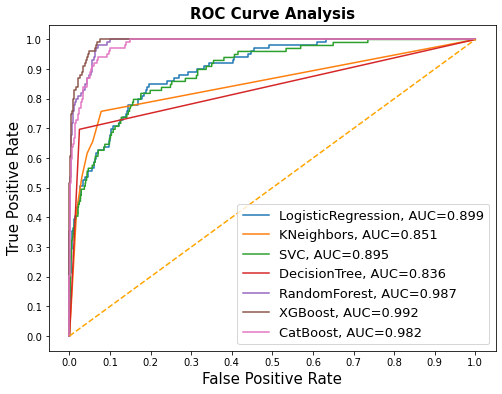

In [29]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [30]:
result_table.iloc[:,:4].sort_values(by='f1_score', ascending=False)

,accuracy,presicion,recall,f1_score
classifiers,,,,
XGBoost,0.979612,0.982710,0.979612,0.980788
CatBoost,0.976939,0.977281,0.976939,0.977105
DecisionTree,0.966243,0.973049,0.966243,0.969018
RandomForest,0.957888,0.975249,0.957888,0.964227
KNeighbors,0.945187,0.964606,0.945187,0.953197
SVC,0.841243,0.963509,0.841243,0.889293
LogisticRegression,0.840575,0.963054,0.840575,0.888827


### Predicting Failure Type given Target

In [31]:
from sklearn.preprocessing import LabelEncoder

failure_type_le = LabelEncoder()
failure_type_le.fit(df['Failure Type'])
print(failure_type_le.classes_)

x = df[failure_type_features]
y = failure_type_le.transform(df['Failure Type'])

['Heat Dissipation Failure' 'No Failure' 'Overstrain Failure'
 'Power Failure' 'Tool Wear Failure']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.3,
                                                    stratify=y)
print(X_train.shape)

(6981, 10)


In [33]:
scaler = StandardScaler()
scaler_columns = ['Air temperature [K]', 'Process temperature [K]',
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','nf']
scaler.fit(X_train[scaler_columns])
X_train[scaler_columns] = scaler.transform(X_train[scaler_columns])

In [34]:
X_test[scaler_columns] = scaler.transform(X_test[scaler_columns])

In [35]:
# for error in column names when using xgboost we are going to change column names to be able to process it
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [36]:
classifiers = {
    "LogisticRegression" : LogisticRegression(solver='liblinear'),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(C = 0.8,kernel='linear',probability=True),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(n_estimators=250,max_depth=12,min_samples_leaf=16),
    "XGBoost" : XGBClassifier(max_depth=12,
                              n_estimators=250,
                              min_child_weight=8, 
                              subsample=0.8, 
                              learning_rate =0.02,    
                              seed=42,
                              eval_metric='mlogloss'),
    "CatBoost" : CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42)
}

result_table = pd.DataFrame(columns=['classifiers','accuracy','presicion','recall','f1_score','fpr','tpr','auc'])

for key, classifier in tqdm(classifiers.items()):
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test,y_predict)
    
    result_table = result_table.append({'classifiers':key,
                                        'accuracy':accuracy_score(y_test, y_predict),
                                        'presicion':precision_score(y_test, y_predict, average='weighted'),
                                        'recall':recall_score(y_test, y_predict, average='weighted'),
                                        'f1_score':f1_score(y_test, y_predict, average='weighted')
                                         }, ignore_index=True)
        
result_table.set_index('classifiers', inplace=True)

  0%|          | 0/7 [00:00<?, ?it/s]

0:	learn: 1.0465001	total: 4.31s	remaining: 17m 53s
25:	learn: 0.0283055	total: 5m 47s	remaining: 49m 50s
50:	learn: 0.0102130	total: 14m 26s	remaining: 56m 19s
75:	learn: 0.0063206	total: 21m 38s	remaining: 49m 32s
100:	learn: 0.0045926	total: 28m 17s	remaining: 41m 44s
125:	learn: 0.0036397	total: 34m 52s	remaining: 34m 19s
150:	learn: 0.0030302	total: 41m 33s	remaining: 27m 14s
175:	learn: 0.0025525	total: 48m 8s	remaining: 20m 14s
200:	learn: 0.0022435	total: 54m 30s	remaining: 13m 17s
225:	learn: 0.0019754	total: 1h 1m 32s	remaining: 6m 32s
249:	learn: 0.0017866	total: 1h 8m 34s	remaining: 0us


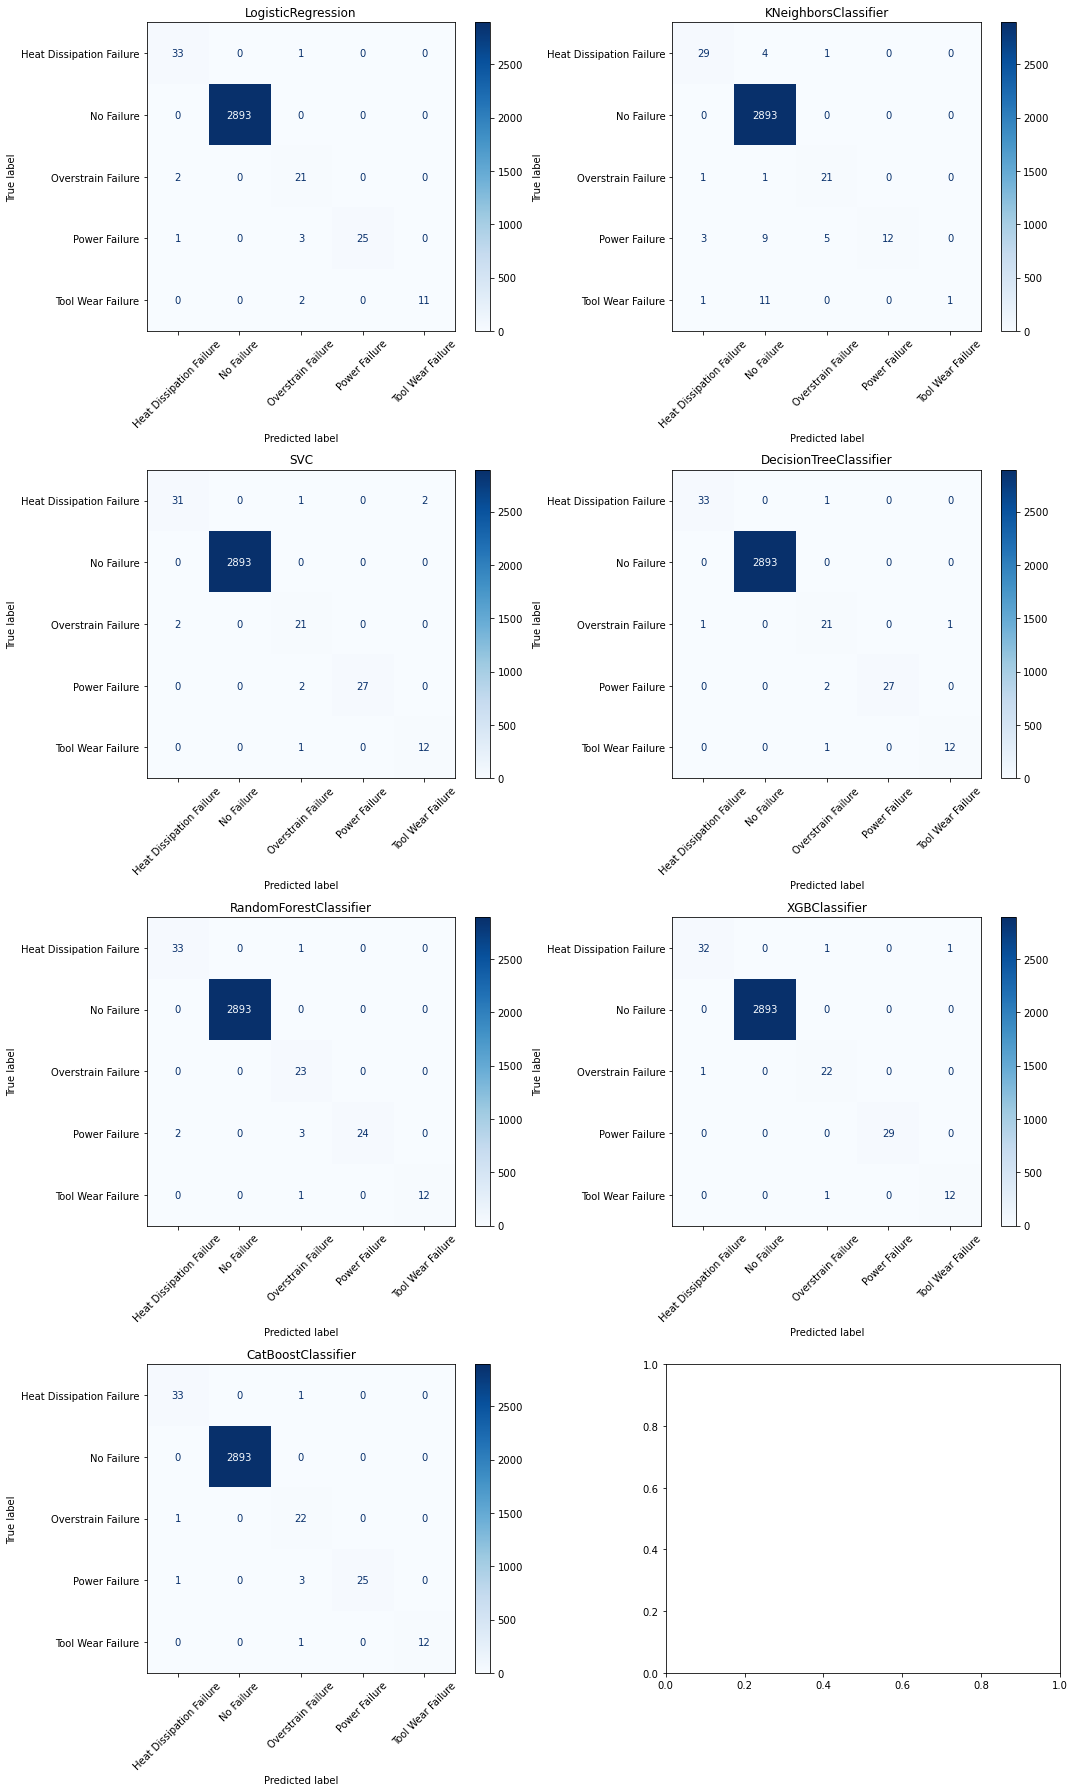

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,25))

for cls, ax in zip(list(classifiers.values()), axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues', 
                          display_labels=failure_type_le.classes_,
                          xticks_rotation=45)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [38]:
result_table.iloc[:,:4].sort_values(by='f1_score', ascending=False)

,accuracy,presicion,recall,f1_score
classifiers,,,,
XGBoost,0.998663,0.998681,0.998663,0.998666
DecisionTree,0.997995,0.998102,0.997995,0.998024
CatBoost,0.997660,0.997927,0.997660,0.997692
RandomForest,0.997660,0.997978,0.997660,0.997664
SVC,0.997326,0.997461,0.997326,0.997362
LogisticRegression,0.996992,0.997345,0.996992,0.997041
KNeighbors,0.987968,0.988337,0.987968,0.985196


### Building Model above Model

[INFO] Failure Type Names: ['Heat Dissipation Failure' 'No Failure' 'Overstrain Failure'
 'Power Failure' 'Tool Wear Failure']
[INFO] Input shape for model_target to be trained on balance data:  (13500, 10)
[INFO] Input shape for model_failure_type to be trained on balance data:  (33750, 10)
accuracy: 0.9976604278074866
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.94      0.97      0.96        34
              No Failure       1.00      1.00      1.00      2893
      Overstrain Failure       0.88      0.91      0.89        23
           Power Failure       0.93      0.90      0.91        29
       Tool Wear Failure       1.00      0.92      0.96        13

                accuracy                           1.00      2992
               macro avg       0.95      0.94      0.94      2992
            weighted avg       1.00      1.00      1.00      2992



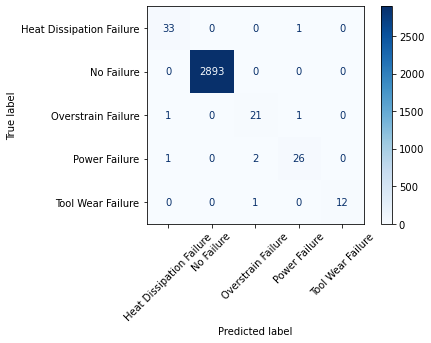

In [39]:
target_features =['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
      'Type_H', 'Type_L', 'Type_M','nf']
failure_type_features = ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
      'Type_H', 'Type_L', 'Type_M','Target','nf']

x=df[target_features]
y=df[['Target', 'Failure Type']]
y['Target'] = y['Target'].astype(int)

# label encoding for Failure Type
failure_type_le = LabelEncoder()
failure_type_le.fit(df['Failure Type'])
print("[INFO] Failure Type Names:",failure_type_le.classes_)

x = df[failure_type_features]
y['Failure Type'] = failure_type_le.transform(df['Failure Type'])


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.3,
                                                    stratify=y)

# standard scaling for both train and test dataset
scaler = StandardScaler()
scaler_columns = ['Air temperature [K]', 'Process temperature [K]',
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','nf']
scaler.fit(X_train[scaler_columns])
X_train[scaler_columns] = scaler.transform(X_train[scaler_columns])

X_train.head()

y = y.astype('int')
X_balance,Y_balance = SMOTE().fit_resample(X_train,y_train['Target'])
X_balance = pd.DataFrame(X_balance, columns = X_train.columns)

X_test[scaler_columns] = scaler.transform(X_test[scaler_columns])
# X_test_balance = X_test
# for error in column names when using xgboost we are going to change column names to be able to process it
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_balance.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_balance.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

# Create Xgboost Model to predict target
model_target = XGBClassifier(max_depth=12,
                             n_estimators=250,
                             min_child_weight=8, 
                             subsample=0.8, 
                             learning_rate =0.02,    
                             seed=42,
                             eval_metric='mlogloss')

print("[INFO] Input shape for model_target to be trained on balance data: ",X_balance.shape)
# train model on balanced dataset
model_target.fit(X_balance, Y_balance)

# predict for X_train and X_test to add target columns to them
y_pedict_train = model_target.predict(X_train)
y_predict_test = model_target.predict(X_test)

# add y_predict to new column in Target for X_train and X_test
X_train['Target'] = y_pedict_train
X_test['Target'] = y_predict_test

# balance dataset for failure type
X_balance,Y_balance_failure_type = SMOTE().fit_resample(X_train,y_train['Failure Type'])
X_balance.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_balance.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

# create Xgboost Model to predict failure type given target
model_failure_type = XGBClassifier(max_depth=12,
                                  n_estimators=250,
                                  min_child_weight=8, 
                                  subsample=0.8, 
                                  learning_rate =0.02,    
                                  seed=42,
                                  eval_metric='mlogloss')

print("[INFO] Input shape for model_failure_type to be trained on balance data: ",X_balance.shape)
model_failure_type.fit(X_balance, Y_balance_failure_type)

predict_failure_type = model_failure_type.predict(X_test)

# print model accuracy
print('accuracy:',accuracy_score(y_test['Failure Type'], predict_failure_type))

# print classification report
from sklearn.metrics import classification_report

cls_report = classification_report(y_test['Failure Type'],predict_failure_type, target_names=failure_type_le.classes_)
print(cls_report)

# plot confusion matrix
plot_confusion_matrix(model_failure_type, 
                      X_test, 
                      y_test['Failure Type'], 
                      cmap='Blues', 
                      display_labels=failure_type_le.classes_,
                      xticks_rotation=45);